Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# The Data

The dataset has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename='./datasets/metadata.csv'
phones=pd.read_csv(filename) 
phones.head()
cols=['tower_id', 'tower_loc', 'call_id','time', 'type', 'lat', 'lon']
phones.columns=cols

In [3]:
phones.head()

,tower_id,tower_loc,call_id,time,type,lat,lon
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [4]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
tower_id     10476 non-null object
tower_loc    10476 non-null object
call_id      1374 non-null object
time         10476 non-null object
type         10476 non-null object
lat          10476 non-null float64
lon          10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [5]:
phones.isnull().sum()

tower_id        0
tower_loc       0
call_id      9102
time            0
type            0
lat             0
lon             0
dtype: int64

In [6]:
phones.nunique()

tower_id      131
tower_loc      71
call_id       130
time         6382
type            3
lat            70
lon            70
dtype: int64

In [7]:
phones.dtypes

tower_id      object
tower_loc     object
call_id       object
time          object
type          object
lat          float64
lon          float64
dtype: object

In [8]:
phones.tower_loc.unique()

array(['REDFERN TE', 'HAYMARKET #', 'CHIPPENDALE',
       'HAYMARKET TE LEVEL 5 SRA BTS HOTEL', '71 MACQUARIE ST',
       'FAIRLIGHT 137 SYDNEY RD', 'MANLY #', 'SURRY HILLS', 'CHINATOWN',
       'SURRY HILLS 418A ELIZABETH ST',
       'SYDNEY DOMESTIC TERMINAL T2 - VIRGIN', 'HOBART AIRPORT',
       'SUNDERLAND ST', 'BRICKWORKS', 'NEW TOWN', 'MOUNT RUMNEY',
       'SYDNEY 2 CASTLEREAGH STREET', 'EDGECLIFF EXCHANGE (PO)',
       'NEWTOWN TE', 'REDFERN; 495 CLEVELAND ST', 'CENTRAL SRA DONOR',
       'DARLINGHURST', 'SYDNEY 450 GEORGE ST', 'DAVID JONES',
       'SYDNEY 131 YORK ST', 'BALGOWLAH VILLAGE SHOPPING CENTRE IBC',
       'SPIT BRIDGE', 'CREMORNE #', 'MASCOT 201 COWARD ST',
       'COLLINS ST (HOBART)', 'GRAND CHANCELLOR 1800', 'BROADWAY OTC',
       'MELB AIRPORT TERM', 'ASCOT VALE SOUTH', 'CARLTON COLLEGE SQ',
       'CREMORNE JUNCTION; GERARD ST', 'MANLY SOUTH STEYNE',
       'ULTIMO BULWARA RD', 'HARBORD 22 WAINE ST', 'KENT #',
       'BALGOWLAH HAYES ST', 'SYDNEY 505 GEORGE ST

In [9]:
phones.type.unique()

array(['Phone', 'SMS', 'Internet'], dtype=object)

In [40]:
phones.groupby('type').count()

,tower_id,tower_loc,call_id,time,lat,lon
type,,,,,,
Internet,9102,9102,0,9102,9102,9102
Phone,717,717,717,717,717,717
SMS,657,657,657,657,657,657


In [48]:
phones.groupby('tower_id').count()

,tower_loc,call_id,time,type,lat,lon
tower_id,,,,,,
5.05E+103,20,20,20,20,20,20
5.05E+106,35,35,35,35,35,35
5.05E+110,19,1,19,19,19,19
5.05E+111,1,1,1,1,1,1
5.05E+113,1,1,1,1,1,1
5.05E+12,1627,395,1627,1627,1627,1627
5.05E+21,1,1,1,1,1,1
5.05E+29,2,2,2,2,2,2
5.05E+78,3,3,3,3,3,3


In [61]:
phones.groupby(['tower_id','tower_loc']).count().sort_values(by='time',ascending=False).head(5)

,,call_id,time,type,lat,lon
tower_id,tower_loc,,,,,
505012056EF02,BALGOWLAH HAYES ST,189,4118,4118,4118,4118
5050101532B23,CHIPPENDALE,17,998,998,998,998
505012950037C,SUNDERLAND ST,7,711,711,711,711
5050129505A15,BRICKWORKS,1,491,491,491,491
505010153111F,HAYMARKET #,84,488,488,488,488


In [62]:
phones.groupby(['tower_id','tower_loc']).count().sort_values(by='time',ascending=False).tail(5)

,,call_id,time,type,lat,lon
tower_id,tower_loc,,,,,
505010153424C,REDFERN TE,1,1,1,1,1
5050101533FF5,DAVID JONES,1,1,1,1,1
50501015334B5,CHIPPENDALE,1,1,1,1,1
50501015334B4,CHIPPENDALE,1,1,1,1,1
50501E0505629,BEECHWORTH,1,1,1,1,1


In [10]:
from mpl_toolkits.basemap import Basemap

In [11]:
loc_lat=phones['lat'].values
loc_lon=phones['lon'].values
print(loc_lat,loc_lon)
#map(x[],zip(loc_lon,loc_lat))
#print(x)

[-33.89293336 -33.89293336 -33.88032891 ... -33.89293336 -33.89293336
 -33.89293336] [151.2022962 151.2022962 151.2056904 ... 151.2022962 151.2022962
 151.2022962]


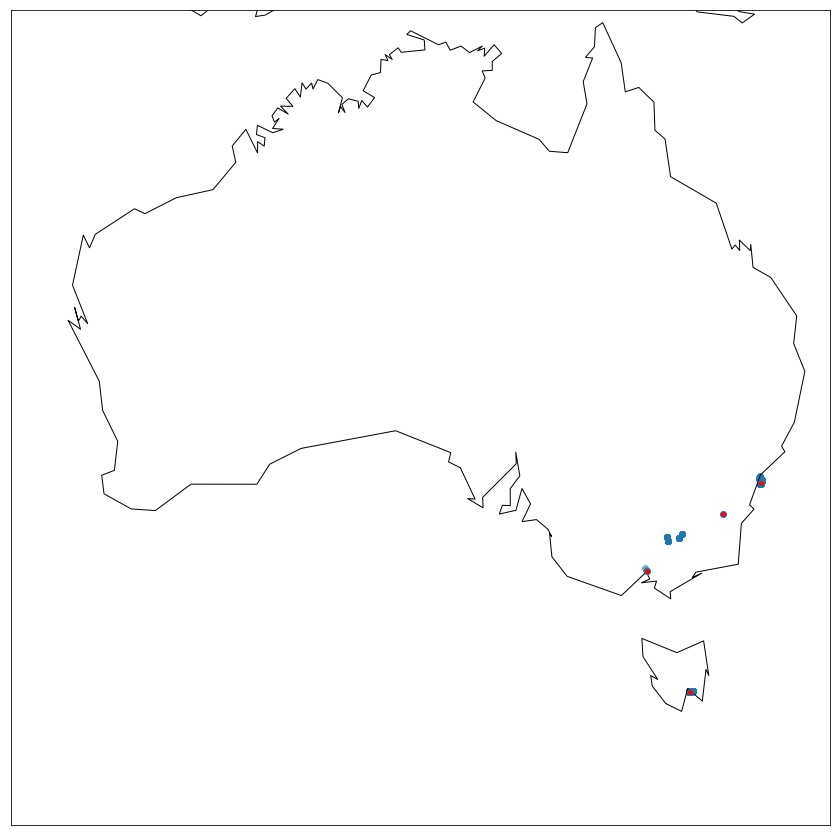

In [38]:

fig = plt.figure(figsize=(15, 15))
sydney=(151.2093,-33.8688)
hobart=(147.3272,-42.8821)
melbourne=(144.9631,-37.8136)
canberra=(149.13,-35.2809)
m = Basemap(projection = 'merc', llcrnrlat=-48, urcrnrlat=-10,
        llcrnrlon=110, urcrnrlon=155)
m.scatter(loc_lon, loc_lat, latlon=True,  cmap='Reds', alpha=0.5)

x, y = m(*zip(*[sydney,hobart,melbourne,canberra]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

m.drawcoastlines()

In [13]:
phones.lat.unique()

array([-33.89293336, -33.88032891, -33.88417103, -33.88024   ,
       -33.86113   , -33.79661   , -33.796679  , -33.88964   ,
       -33.87829   , -33.8864    , -33.93416   , -42.83762   ,
       -42.84338   , -42.85984   , -42.85307   , -42.8606    ,
       -33.86655   , -33.87932   , -33.89605   , -33.89233   ,
       -33.87814   , -33.87055   , -33.8703    , -33.87215   ,
       -33.793648  , -33.80638   , -33.83096   , -33.924799  ,
       -42.88194   , -42.88101   , -33.884603  , -37.670418  ,
       -37.7778    , -37.7929    , -33.828073  , -33.79948   ,
       -33.879     , -33.779333  , -33.86633   , -33.78815   ,
       -33.87513   , -33.79345   , -33.79275   , -33.934674  ,
       -33.923217  , -33.937558  , -33.94674   , -33.93285   ,
       -33.90533   , -33.85947   , -33.8294    , -33.791965  ,
       -42.87457   , -42.88029   , -33.83415   , -33.88058   ,
       -42.82842   , -42.88481   , -33.75949   , -33.63599   ,
       -33.71763   , -33.57839   , -33.6038    , -33.55

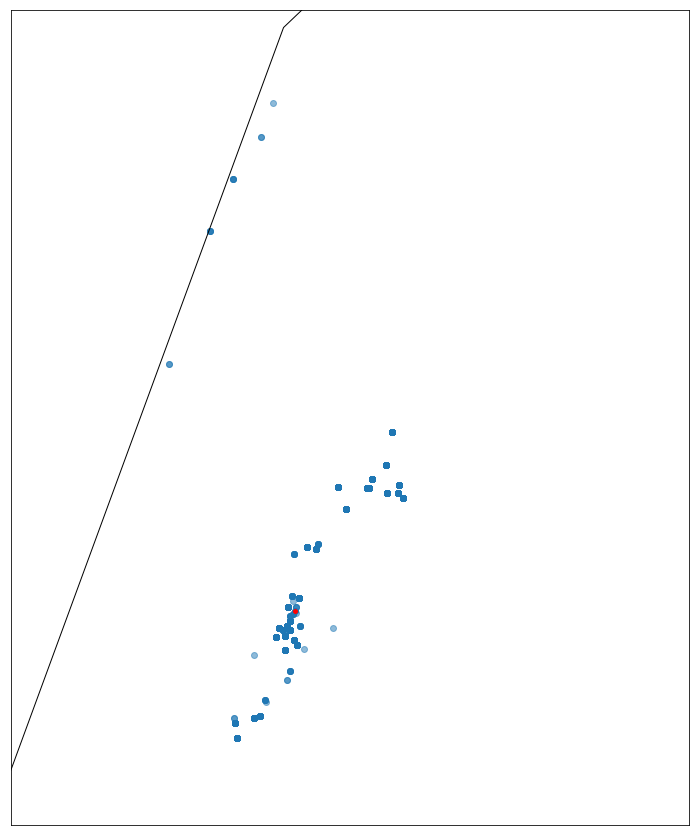

In [32]:
fig = plt.figure(figsize=(15, 15))#around Sydney
sydney=(151.2093,-33.8688)
hobart=(147.3272,-42.8821)
melbourne=(144.9631,-37.8136)
m = Basemap(projection = 'merc', llcrnrlat=-34, urcrnrlat=-33.5,
        llcrnrlon=151, urcrnrlon=151.5)
m.scatter(loc_lon, loc_lat, latlon=True,  cmap='Reds', alpha=0.5)
x, y = m(*zip(*[sydney,hobart,melbourne]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

m.drawcoastlines()

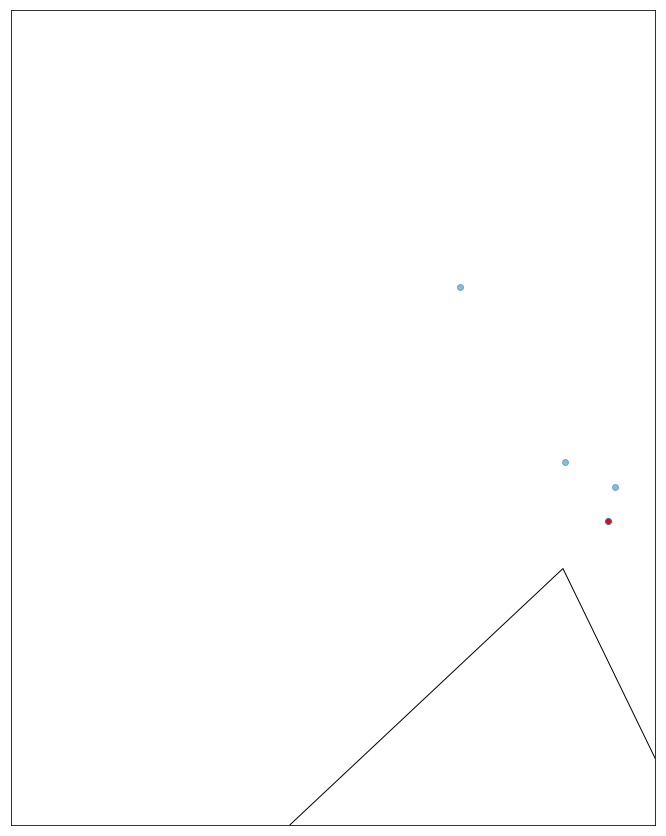

In [33]:
fig = plt.figure(figsize=(15, 15))#around Melbourne
sydney=(151.2093,-33.8688)
hobart=(147.3272,-42.8821)
melbourne=(144.9631,-37.8136)
m = Basemap(projection = 'merc', llcrnrlat=-38, urcrnrlat=-37.5,
        llcrnrlon=144.5, urcrnrlon=145)
m.scatter(loc_lon, loc_lat, latlon=True,  cmap='Reds', alpha=0.5)

x, y = m(*zip(*[sydney,hobart,melbourne]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

m.drawcoastlines()

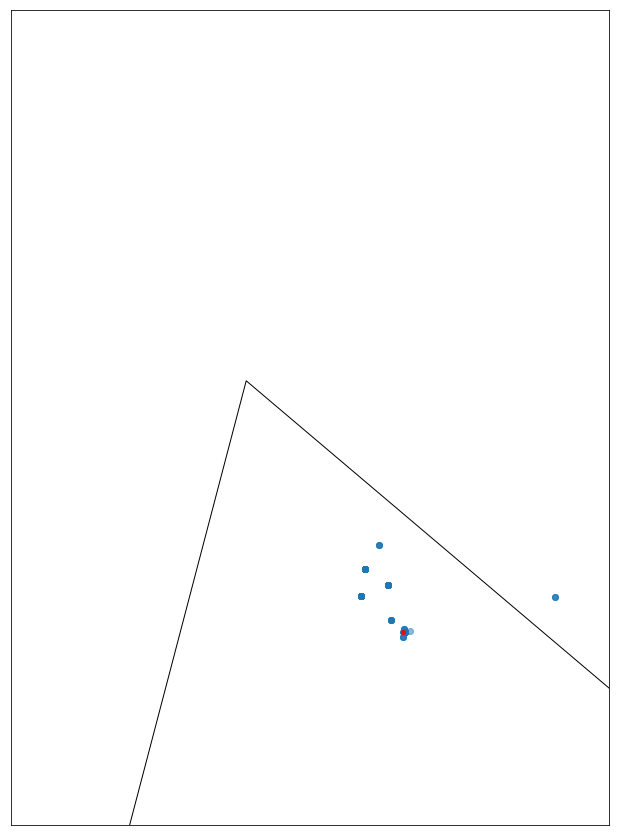

In [34]:
fig = plt.figure(figsize=(15, 15))#around Hobart
sydney=(151.2093,-33.8688)
hobart=(147.3272,-42.8821)
melbourne=(144.9631,-37.8136)
m = Basemap(projection = 'merc', llcrnrlat=-43, urcrnrlat=-42.5,
        llcrnrlon=147, urcrnrlon=147.5)
#m.scatter(loc_lon, loc_lat, latlon=True,  cmap='Reds', alpha=0.5)
m.scatter(loc_lon, loc_lat, latlon=True,  cmap='Reds', alpha=0.5)

x, y = m(*zip(*[sydney,hobart,melbourne]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

m.drawcoastlines()